In [1]:
#Задание 2.2
#Для датасета CCPP.
#1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.
#2) Постройте регрессионную модель.  Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.
#3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). 
#Отобразите вместе с ними прямую y=t. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
ccpp_df = pd.read_excel('XLSX_files/Folds5x2_pp.xlsx')
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
#Выделение валидационной и тестовой выборки:
ccpp_train_val, ccpp_test = train_test_split(ccpp_df, test_size = 0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size = 0.1)

In [5]:
#Построить регрессионную модель:

#Прогнозируется столбец PE, следовательно:

#Модель линейной регрессии
linear_regression_model = LinearRegression()

#Данные для обучения модели
x_train = ccpp_train.drop('PE',axis=1)
y_train = ccpp_train['PE']

#Обучение модели с помощью fit
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [6]:
#Замерить коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке:

#Предсказания признака PE:
predictions_PE = linear_regression_model.predict(ccpp_val.drop('PE', axis = 1))

In [7]:
#Коэффициент R^2 на валидационной выборке
r2_score(ccpp_val['PE'], predictions_PE)

0.9306494229756909

In [8]:
#Средняя абсолютная ошибка предсказания на валидационной выборке
mean_absolute_error(ccpp_val['PE'], predictions_PE)

3.656168970959635

In [9]:
#Среднеквадратическая ошибка предсказания на валидационной выборке
mean_squared_error(ccpp_val['PE'], predictions_PE)

19.98917035044427

In [10]:
ccpp_val

,AT,V,AP,RH,PE
8909,12.05,40.55,1016.63,100.14,472.19
3044,6.63,39.37,1020.33,76.18,489.16
7039,31.13,67.45,1015.02,41.34,435.14
4213,22.19,70.02,1011.03,82.49,444.85
7410,7.24,41.17,1020.35,80.56,486.76
...,...,...,...,...,...
1696,29.31,64.84,1010.49,53.97,442.11
8162,17.88,45.87,1008.39,93.63,455.83
2237,20.01,43.77,1012.13,65.53,455.66
1291,27.54,75.60,1018.26,57.89,440.87


In [11]:
ccpp_train

,AT,V,AP,RH,PE
7077,12.95,41.23,993.74,96.35,469.05
2480,25.86,61.08,1013.51,67.50,449.67
1030,24.27,60.23,1011.84,77.80,438.99
2359,20.07,42.23,1012.86,74.11,461.25
3765,32.38,69.05,1000.76,45.85,429.31
...,...,...,...,...,...
3624,11.44,34.03,1018.57,74.06,476.06
2924,20.86,63.73,1008.54,96.83,440.42
7641,13.86,50.59,1019.20,97.22,467.23
1508,21.14,67.71,1006.38,56.78,445.12


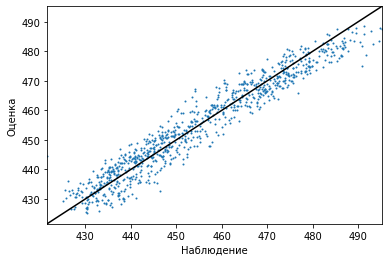

In [13]:
#Построить точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели)
#Отобразить вместе с ними прямую y=t

fig, ax = plt.subplots()

min_ = ccpp_val['PE'].min()
max_ = ccpp_val['PE'].max()

ax.set_xlim(min_, max_) 
ax.set_ylim(min_, max_)  

ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')

t = ccpp_val['PE']  #t=истинное значение
y = predictions_PE  #y=предсказание модели

plt.scatter(t, y, s = 1)

plt.plot(np.linspace(min_, max_), np.linspace(min_, max_), color = 'black')
plt.show()